In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set(palette='pastel')

In [ ]:
# 데이터 불러오기
train=pd.read_csv("/content/drive/MyDrive/ESAA/23-2/movies_train.csv")

In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
train['dir_prev_bfnum'].fillna(0, inplace=True)
train['release_time']=pd.to_datetime(train['release_time'])

0


# 1

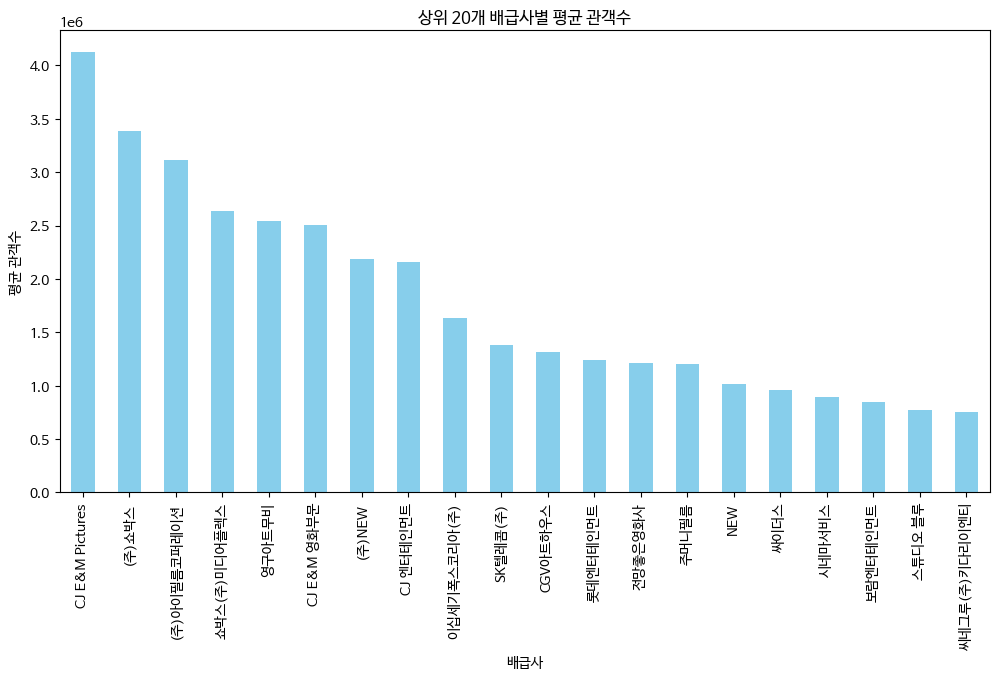

In [ ]:
# distributor 종류에 따른 box_off_num의 평균 계산
mean_box_office = train.groupby('distributor')['box_off_num'].mean().sort_values(ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 6))
mean_box_office.plot(kind='bar', color='skyblue')
plt.title('상위 20개 배급사별 평균 관객수')
plt.xlabel('배급사')
plt.ylabel('평균 관객수')
plt.xticks(rotation=90)
plt.show()

- CJ, 쇼박스의 계열사가 상위권을 차지한 것을 알 수 있다.

# 2

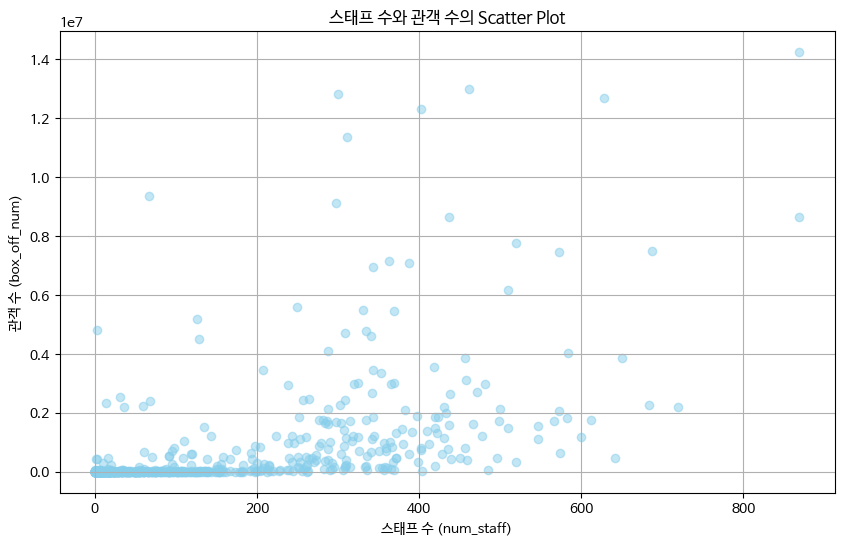

In [ ]:
# 스태프수- 관객수
plt.figure(figsize=(10, 6))
plt.scatter(train['num_staff'], train['box_off_num'], alpha=0.5 , color='skyblue')
plt.title('스태프 수와 관객 수의 Scatter Plot')
plt.xlabel('스태프 수 (num_staff)')
plt.ylabel('관객 수 (box_off_num)')
plt.grid(True)
plt.show()

- 관객수가 많은 영화들은 관객수가 적은 영화보다 스태프 수가 많은 경향이 있다.

# 3

<Figure size 1200x600 with 0 Axes>

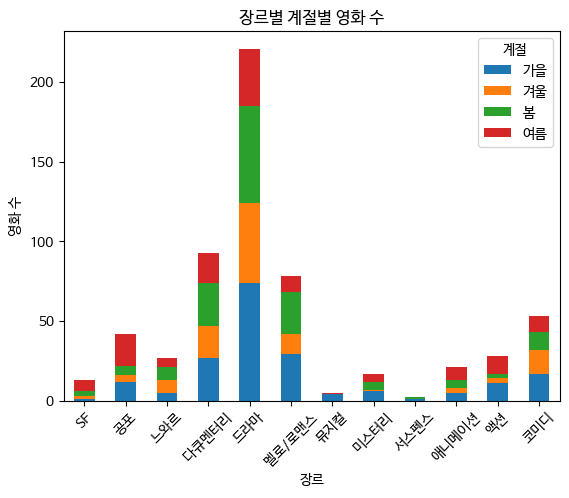

In [ ]:
# 장르 - 계절

# 개봉일을 월(month)로 추출
train['release_month'] = pd.to_datetime(train['release_time']).dt.month

# 계절 정의
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

# 개봉월을 기반으로 계절 열 추가
train['season'] = train['release_month'].apply(get_season)

# 장르별, 계절별 영화 수 집계
genre_season_counts = train.groupby(['genre', 'season']).size().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
genre_season_counts.plot(kind='bar', stacked=True)
plt.title('장르별 계절별 영화 개봉 수')
plt.xlabel('장르')
plt.ylabel('영화 수')
plt.legend(title='계절', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


- 공포, SF는 여름에 주로 개봉하는 것을 알 수 있다.
- 드라마 장르가 압도적으로 많이 개봉하는 것을 알 수 있다.
- 액션은 여름, 가을에 주로 개봉한다.
- 다큐멘터리는 계절의 영향을 별로 받지 않는다.
- 멜로/로맨스는 봄가을에 개봉을 많이 한다.

<Figure size 1200x600 with 0 Axes>

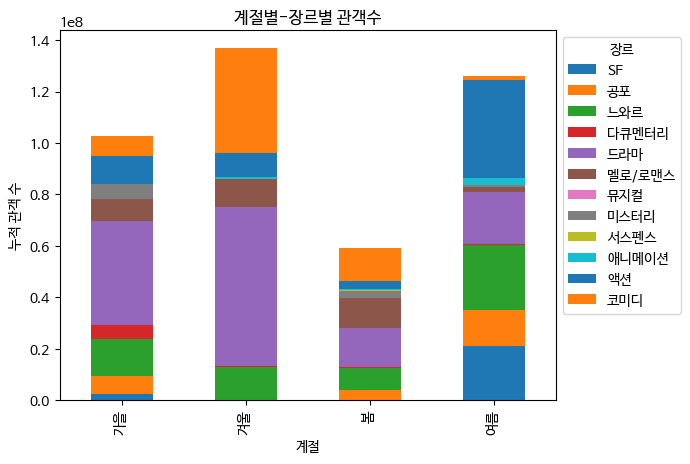

In [ ]:
# 계절 - 장르

# 개봉일을 월(month)로 추출
train['release_month'] = pd.to_datetime(train['release_time']).dt.month

# 계절 정의
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

# 개봉월을 기반으로 계절 열 추가
train['season'] = train['release_month'].apply(get_season)

# 계절별, 장르별 관객수의 합 계산
season_genre_box_office = train.groupby(['season', 'genre'])['box_off_num'].sum().unstack()

# 시각화
plt.figure(figsize=(12, 6))
season_genre_box_office.plot(kind='bar', stacked=True)
plt.title('계절별-장르별 관객수')
plt.xlabel('계절')
plt.ylabel('누적 관객 수')
plt.legend(title='장르', bbox_to_anchor=(1, 1))
plt.show()


- 가을,겨울에 드라마의 비율이 높다.
- 겨울에 개봉하는 코미디 영화의 수가 높다.
- 여름에는 액션,SF,공포 영화가 개봉을 많이 한다.
- 다른 계절에 비해 여름에는 멜로/로맨스 영화의 수가 적다.

# 4

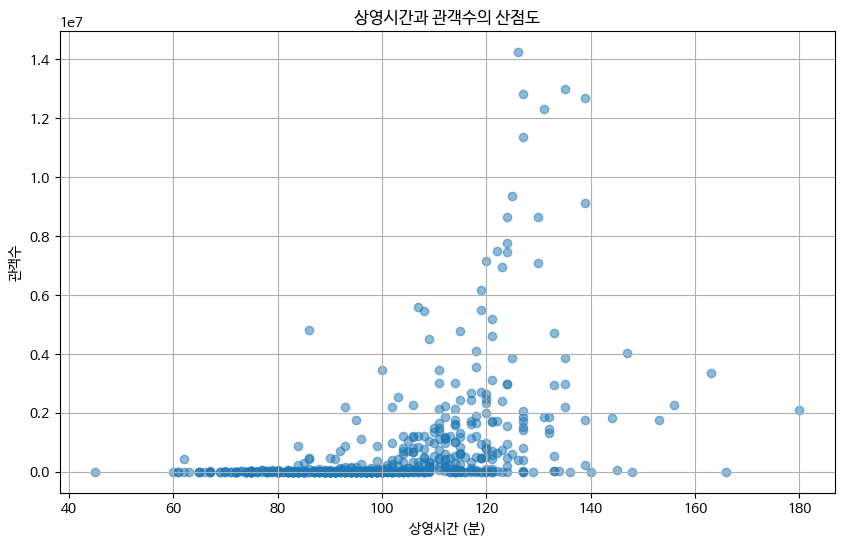

In [ ]:
# 상영시간 -관객수

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(train['time'], train['box_off_num'], alpha=0.5)
plt.title('상영시간과 관객수의 산점도')
plt.xlabel('상영시간 (분)')
plt.ylabel('관객수')
plt.grid(True)
plt.show()

- 상영시간이 길다고 관객수가 많은 것은 아니다.
- 상영시간이 100분~140분 사이에 있는 영화가 상대적으로 관객수가 높은 것을 알 수 있다.

# 5

<Figure size 1200x600 with 0 Axes>

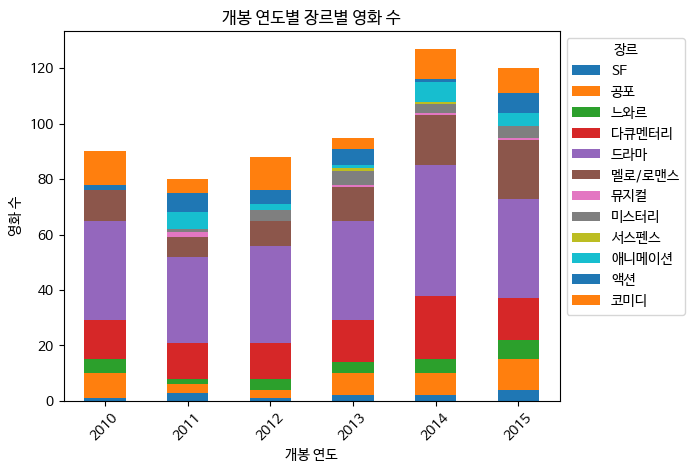

In [ ]:
# 개봉 연도 - 장르 추세 확인

# 개봉 연도 추출
train['release_year'] = pd.to_datetime(train['release_time']).dt.year

# 개봉 연도별 장르별 영화 수 집계
genre_yearly_counts = train.groupby(['release_year', 'genre']).size().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
genre_yearly_counts.plot(kind='bar', stacked=True)
plt.title('개봉 연도별 장르별 영화 수')
plt.xlabel('개봉 연도')
plt.ylabel('영화 수')
plt.xticks(rotation=45)
plt.legend(title='장르', bbox_to_anchor=(1, 1))
plt.show()

- 드라마의 비율이 꾸준히 높다는 것을 알 수 있다.
-